In [4]:
from transformers import ViTConfig, ViTModel

# Initializing a ViT vit-base-patch16-224 style configuration
configuration = ViTConfig()

# Initializing a model (with random weights) from the vit-base-patch16-224 style configuration
model = ViTModel(configuration)

# Accessing the model configuration
configuration = model.config

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


  0%|          | 0/1 [00:00<?, ?it/s]

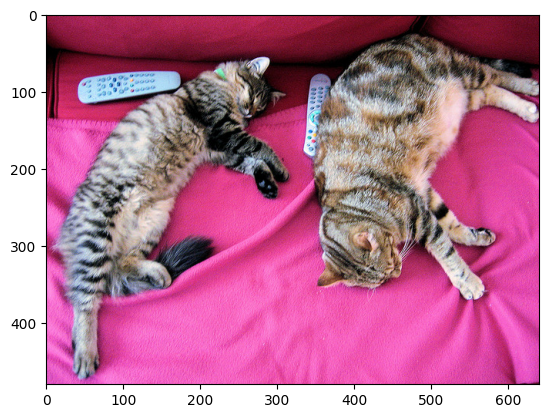

[1, 197, 768]

In [8]:
from transformers import ViTFeatureExtractor, ViTModel
import torch
from datasets import load_dataset
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
imgplot = plt.imshow(image)
plt.show()
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

In [10]:
from transformers import ViTFeatureExtractor, ViTForMaskedImageModeling
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTForMaskedImageModeling.from_pretrained("google/vit-base-patch16-224-in21k")

num_patches = (model.config.image_size // model.config.patch_size) ** 2
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
# create random boolean mask of shape (batch_size, num_patches)
bool_masked_pos = torch.randint(low=0, high=2, size=(1, num_patches)).bool()

outputs = model(pixel_values, bool_masked_pos=bool_masked_pos)
loss, reconstructed_pixel_values = outputs.loss, outputs.logits
list(reconstructed_pixel_values.shape)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForMaskedImageModeling: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForMaskedImageModeling from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForMaskedImageModeling from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForMaskedImageModeling were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['decoder.0.weight', 'embeddings.mask_token', 'decoder.0.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[1, 3, 224, 224]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
5592960


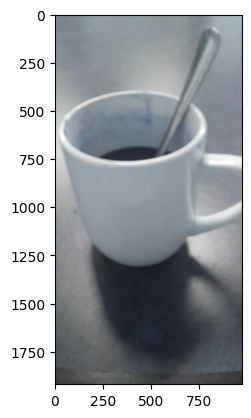

espresso


In [17]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import torch
from datasets import load_dataset
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


# dataset = load_dataset("huggingface/cats-image")
# image = dataset["test"]["image"][0]

image = cv2.imread("images/4.jpg")
print(image.size)
imgplot = plt.imshow(image)
plt.show()

feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-large-patch32-384")
model = ViTForImageClassification.from_pretrained("google/vit-large-patch32-384")

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

# vit_jax

In [2]:
# Shows all available pre-trained models.
!gsutil ls -lh gs://vit_models/imagenet\*
!gsutil ls -lh gs://vit_models/sam
!gsutil ls -lh gs://mixer_models/\*

gs://vit_models/imagenet21k+imagenet2012/:
377.57 MiB  2020-11-30T16:17:02Z  gs://vit_models/imagenet21k+imagenet2012/R50+ViT-B_16.npz
330.29 MiB  2020-10-29T17:05:52Z  gs://vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz
 331.4 MiB  2020-10-20T11:48:22Z  gs://vit_models/imagenet21k+imagenet2012/ViT-B_16.npz
336.89 MiB  2020-10-20T11:47:36Z  gs://vit_models/imagenet21k+imagenet2012/ViT-B_32.npz
334.78 MiB  2021-03-12T09:04:16Z  gs://vit_models/imagenet21k+imagenet2012/ViT-B_8.npz
  1.13 GiB  2020-10-29T17:08:31Z  gs://vit_models/imagenet21k+imagenet2012/ViT-L_16-224.npz
  1.14 GiB  2020-10-20T11:53:44Z  gs://vit_models/imagenet21k+imagenet2012/ViT-L_16.npz
  1.14 GiB  2020-10-20T11:50:56Z  gs://vit_models/imagenet21k+imagenet2012/ViT-L_32.npz

gs://vit_models/imagenet21k/:
450.23 MiB  2021-01-20T14:12:43Z  gs://vit_models/imagenet21k/R26+ViT-B_32.npz
439.85 MiB  2020-11-30T10:10:15Z  gs://vit_models/imagenet21k/R50+ViT-B_16.npz
  1.31 GiB  2021-01-20T14:11:54Z  gs://vit_models/ima

In [1]:
# Download a pre-trained model.

# Note: you can really choose any of the above, but this Colab has been tested
# with the models of below selection...
model_name = 'ViT-B_32'  #@param ["ViT-B_32", "Mixer-B_16"]

if model_name.startswith('ViT'):
  ![ -e "$model_name".npz ] || gsutil cp gs://vit_models/imagenet21k/"$model_name".npz .
if model_name.startswith('Mixer'):
  ![ -e "$model_name".npz ] || gsutil cp gs://mixer_models/imagenet21k/"$model_name".npz .

import os
assert os.path.exists(f'{model_name}.npz')

In [2]:
from absl import logging
import flax
import jax
from matplotlib import pyplot as plt
import numpy as np
import optax
import tqdm

logging.set_verbosity(logging.INFO)

# Shows the number of available devices.
# In a CPU/GPU runtime this will be a single device.
# In a TPU runtime this will be 8 cores.
jax.local_devices()

[StreamExecutorGpuDevice(id=0, process_index=0, slice_index=0)]

In [3]:
# Import files from repository.
# Updating the files in the editor on the right will immediately update the
# modules by re-importing them.

import sys
if './vision_transformer' not in sys.path:
  sys.path.append('./vision_transformer')

%load_ext autoreload
%autoreload 2

from vit_jax import checkpoint
from vit_jax import input_pipeline
from vit_jax import utils
from vit_jax import models
from vit_jax import train
from vit_jax.configs import common as common_config
from vit_jax.configs import models as models_config

/home/hoangphuc/miniconda3/envs/FAS/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Helper functions for images.

labelnames = dict(
  # https://www.cs.toronto.edu/~kriz/cifar.html
  cifar10=('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'),
  # https://www.cs.toronto.edu/~kriz/cifar.html
  cifar100=('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')
)
def make_label_getter(dataset):
  """Returns a function converting label indices to names."""
  def getter(label):
    if dataset in labelnames:
      return labelnames[dataset][label]
    return f'label={label}'
  return getter

def show_img(img, ax=None, title=None):
  """Shows a single image."""
  if ax is None:
    ax = plt.gca()
  ax.imshow(img[...])
  ax.set_xticks([])
  ax.set_yticks([])
  if title:
    ax.set_title(title)

def show_img_grid(imgs, titles):
  """Shows a grid of images."""
  n = int(np.ceil(len(imgs)**.5))
  _, axs = plt.subplots(n, n, figsize=(3 * n, 3 * n))
  for i, (img, title) in enumerate(zip(imgs, titles)):
    img = (img + 1) / 2  # Denormalize
    show_img(img, axs[i // n][i % n], title)

### Load dataset

In [5]:
dataset = 'cifar10'
batch_size = 512
config = common_config.with_dataset(common_config.get_config(), dataset)
num_classes = input_pipeline.get_dataset_info(dataset, 'train')['num_classes']
config.batch = batch_size
config.pp.crop = 224

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2


In [6]:
# For details about setting up datasets, see input_pipeline.py on the right.
ds_train = input_pipeline.get_data_from_tfds(config=config, mode='train')
ds_test = input_pipeline.get_data_from_tfds(config=config, mode='test')

del config  # Only needed to instantiate datasets.

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
INFO:absl:Reusing dataset cifar10 (/home/hoangphuc/tensorflow_datasets/cifar10/3.0.2)
INFO:absl:Constructing tf.data.Dataset cifar10 for split train[:98%], from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
INFO:absl:Reusing dataset cifar10 (/home/hoangphuc/tensorflow_datasets/cifar10/3.0.2)
INFO:absl:Constructing tf.data.Dataset cifar10 for split test, from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2


In [7]:
# Fetch a batch of test images for illustration purposes.
batch = next(iter(ds_test.as_numpy_iterator()))
# Note the shape : [num_local_devices, local_batch_size, h, w, c]
batch['image'].shape

2022-12-23 22:06:32.093274: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(1, 512, 224, 224, 3)

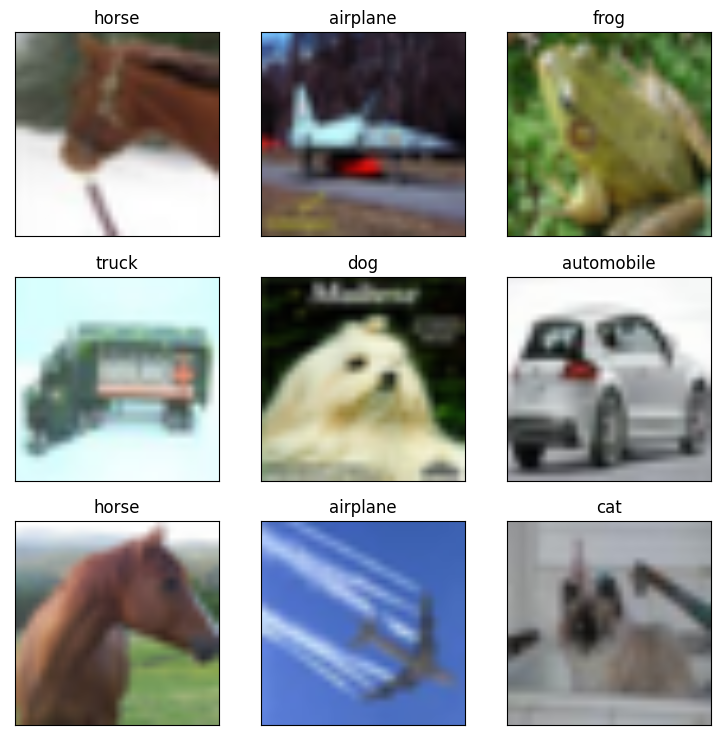

In [8]:
# Show some imags with their labels.
images, labels = batch['image'][0][:9], batch['label'][0][:9]
titles = map(make_label_getter(dataset), labels.argmax(axis=1))
show_img_grid(images, titles)

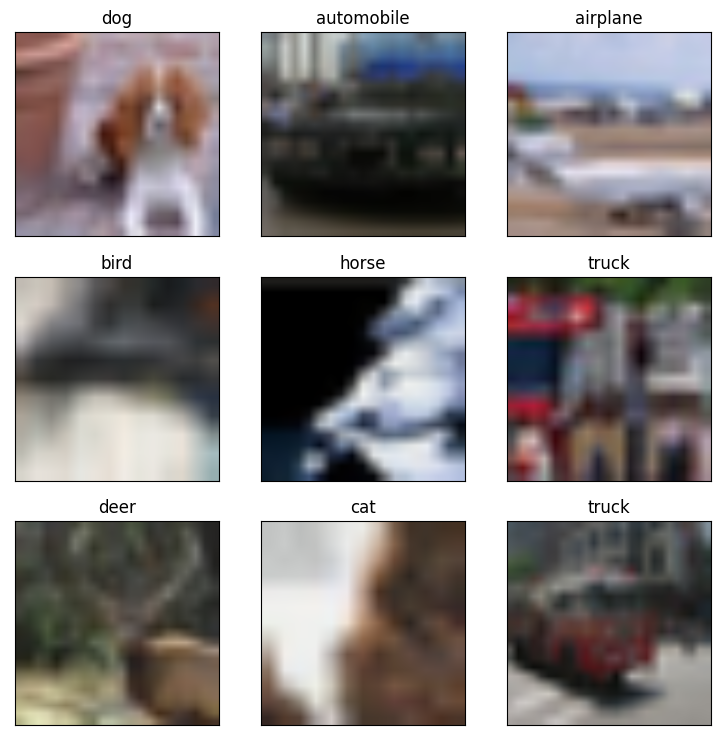

In [9]:
# Same as above, but with train images.
# Note how images are cropped/scaled differently.
# Check out input_pipeline.get_data() in the editor at your right to see how the
# images are preprocessed differently.
batch = next(iter(ds_train.as_numpy_iterator()))
images, labels = batch['image'][0][:9], batch['label'][0][:9]
titles = map(make_label_getter(dataset), labels.argmax(axis=1))
show_img_grid(images, titles)

### Load pre-trained

In [10]:
model_config = models_config.MODEL_CONFIGS[model_name]
model_config

classifier: token
hidden_size: 768
model_name: ViT-B_32
patches:
  size: !!python/tuple
  - 32
  - 32
representation_size: null
transformer:
  attention_dropout_rate: 0.0
  dropout_rate: 0.0
  mlp_dim: 3072
  num_heads: 12
  num_layers: 12

In [11]:
# Load model definition & initialize random parameters.
# This also compiles the model to XLA (takes some minutes the first time).
if model_name.startswith('Mixer'):
  model = models.MlpMixer(num_classes=num_classes, **model_config)
else:
  model = models.VisionTransformer(num_classes=num_classes, **model_config)
variables = jax.jit(lambda: model.init(
    jax.random.PRNGKey(0),
    # Discard the "num_local_devices" dimension of the batch for initialization.
    batch['image'][0, :1],
    train=False,
), backend='cpu')()

In [12]:
# Load and convert pretrained checkpoint.
# This involves loading the actual pre-trained model results, but then also also
# modifying the parameters a bit, e.g. changing the final layers, and resizing
# the positional embeddings.
# For details, refer to the code and to the methods of the paper.
params = checkpoint.load_pretrained(
    pretrained_path=f'{model_name}.npz',
    init_params=variables['params'],
    model_config=model_config,
)

INFO:absl:Inspect extra keys:
{'pre_logits/kernel', 'pre_logits/bias'}
INFO:absl:load_pretrained: drop-head variant


### Evaluate

In [13]:
# So far, all our data is in the host memory. Let's now replicate the arrays
# into the devices.
# This will make every array in the pytree params become a ShardedDeviceArray
# that has the same data replicated across all local devices.
# For TPU it replicates the params in every core.
# For a single GPU this simply moves the data onto the device.
# For CPU it simply creates a copy.
params_repl = flax.jax_utils.replicate(params)
print('params.cls:', type(params['head']['bias']).__name__,
      params['head']['bias'].shape)
print('params_repl.cls:', type(params_repl['head']['bias']).__name__,
      params_repl['head']['bias'].shape)

params.cls: Array (10,)
params_repl.cls: Array (1, 10)


In [14]:
# Then map the call to our model's forward pass onto all available devices.
vit_apply_repl = jax.pmap(lambda params, inputs: model.apply(
    dict(params=params), inputs, train=False))

In [15]:
def get_accuracy(params_repl):
  """Returns accuracy evaluated on the test set."""
  good = total = 0
  steps = input_pipeline.get_dataset_info(dataset, 'test')['num_examples'] // batch_size
  for _, batch in zip(tqdm.trange(steps), ds_test.as_numpy_iterator()):
    predicted = vit_apply_repl(params_repl, batch['image'])
    is_same = predicted.argmax(axis=-1) == batch['label'].argmax(axis=-1)
    good += is_same.sum()
    total += len(is_same.flatten())
  return good / total

In [16]:
# Random performance without fine-tuning.
get_accuracy(params_repl)

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
100%|██████████| 19/19 [00:34<00:00,  1.82s/it]


Array(0.10063734, dtype=float32)

### Fine-tune

In [17]:
# 100 Steps take approximately 15 minutes in the TPU runtime.
total_steps = 100
warmup_steps = 5
decay_type = 'cosine'
grad_norm_clip = 1
# This controls in how many forward passes the batch is split. 8 works well with
# a TPU runtime that has 8 devices. 64 should work on a GPU. You can of course
# also adjust the batch_size above, but that would require you to adjust the
# learning rate accordingly.
accum_steps = 8
base_lr = 0.03

In [18]:
# Check out train.make_update_fn in the editor on the right side for details.
lr_fn = utils.create_learning_rate_schedule(total_steps, base_lr, decay_type, warmup_steps)
# We use a momentum optimizer that uses half precision for state to save
# memory. It als implements the gradient clipping.
tx = optax.chain(
    optax.clip_by_global_norm(grad_norm_clip),
    optax.sgd(
        learning_rate=lr_fn,
        momentum=0.9,
        accumulator_dtype='bfloat16',
    ),
)
update_fn_repl = train.make_update_fn(
    apply_fn=model.apply, accum_steps=accum_steps, tx=tx)
opt_state = tx.init(params)
opt_state_repl = flax.jax_utils.replicate(opt_state)

In [19]:
# Initialize PRNGs for dropout.
update_rng_repl = flax.jax_utils.replicate(jax.random.PRNGKey(0))

100%|██████████| 100/100 [06:20<00:00,  3.81s/it]


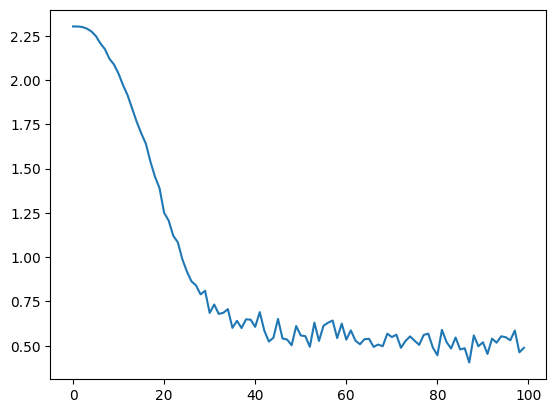

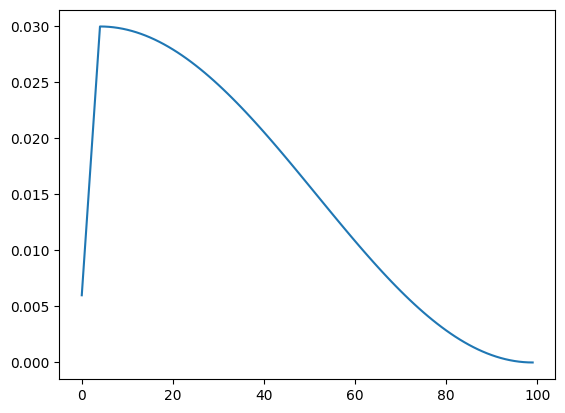

In [20]:
losses = []
lrs = []
# Completes in ~20 min on the TPU runtime.
for step, batch in zip(
    tqdm.trange(1, total_steps + 1),
    ds_train.as_numpy_iterator(),
):

  params_repl, opt_state_repl, loss_repl, update_rng_repl = update_fn_repl(
      params_repl, opt_state_repl, batch, update_rng_repl)
  losses.append(loss_repl[0])
  lrs.append(lr_fn(step))

plt.plot(losses)
plt.figure()
plt.plot(lrs)

In [21]:
# Should be ~96.7% for Mixer-B/16 or 97.7% for ViT-B/32 on CIFAR10 (both @224)
get_accuracy(params_repl)

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/cifar10/3.0.2
100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


Array(0.9770765, dtype=float32)

### Inference

In [22]:
# Download a pre-trained model.

if model_name.startswith('Mixer'):
  # Download model trained on imagenet2012
  ![ -e "$model_name"_imagenet2012.npz ] || gsutil cp gs://mixer_models/imagenet1k/"$model_name".npz "$model_name"_imagenet2012.npz
  model = models.MlpMixer(num_classes=1000, **model_config)
else:
  # Download model pre-trained on imagenet21k and fine-tuned on imagenet2012.
  ![ -e "$model_name"_imagenet2012.npz ] || gsutil cp gs://vit_models/imagenet21k+imagenet2012/"$model_name".npz "$model_name"_imagenet2012.npz
  model = models.VisionTransformer(num_classes=1000, **model_config)

import os
assert os.path.exists(f'{model_name}_imagenet2012.npz')

In [23]:
# Load and convert pretrained checkpoint.
params = checkpoint.load(f'{model_name}_imagenet2012.npz')
params['pre_logits'] = {}  # Need to restore empty leaf for Flax.

In [24]:
# Get imagenet labels.
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

--2022-12-23 22:15:05--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4005:81c::2010, 2404:6800:4005:81b::2010, 2404:6800:4005:81a::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:81c::2010|:443... failed: Network is unreachable.
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:81b::2010|:443... failed: Network is unreachable.
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:81a::2010|:443... failed: Network is unreachable.
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:809::2010|:443... failed: Network is unreachable.
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt.3’

ilsvrc2012_wordnet_ 100%[=====

--2022-12-23 22:15:44--  https://picsum.photos/384
Resolving picsum.photos (picsum.photos)... 2606:4700:20::681a:51e, 2606:4700:20::ac43:4aa3, 2606:4700:20::681a:41e, ...
Connecting to picsum.photos (picsum.photos)|2606:4700:20::681a:51e|:443... failed: Network is unreachable.
Connecting to picsum.photos (picsum.photos)|2606:4700:20::ac43:4aa3|:443... failed: Network is unreachable.
Connecting to picsum.photos (picsum.photos)|2606:4700:20::681a:41e|:443... failed: Network is unreachable.
Connecting to picsum.photos (picsum.photos)|172.67.74.163|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://i.picsum.photos/id/158/384/384.jpg?hmac=rDmHj4TzCuy_-LUdORmt9I4AEtSg3izjTtLDnmVSHRg [following]
--2022-12-23 22:16:02--  https://i.picsum.photos/id/158/384/384.jpg?hmac=rDmHj4TzCuy_-LUdORmt9I4AEtSg3izjTtLDnmVSHRg
Resolving i.picsum.photos (i.picsum.photos)... 2606:4700:20::681a:51e, 2606:4700:20::ac43:4aa3, 2606:4700:20::681a:41e, ...
Connecting to i.picsum.ph

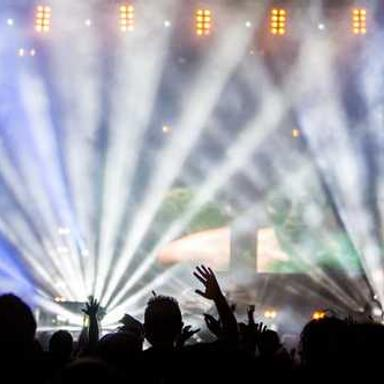

In [25]:
# Get a random picture with the correct dimensions.
resolution = 224 if model_name.startswith('Mixer') else 384
!wget https://picsum.photos/$resolution -O picsum.jpg
import PIL
img = PIL.Image.open('picsum.jpg')
img

In [26]:
# Predict on a batch with a single item (note very efficient TPU usage...)
logits, = model.apply(dict(params=params), (np.array(img) / 128 - 1)[None, ...], train=False)

In [27]:
preds = np.array(jax.nn.softmax(logits))
for idx in preds.argsort()[:-11:-1]:
  print(f'{preds[idx]:.5f} : {imagenet_labels[idx]}', end='')

0.62421 : stage
0.29455 : spotlight, spot
0.01411 : loudspeaker, speaker, speaker_unit, loudspeaker_system, speaker_system
0.01321 : microphone, mike
0.00821 : torch
0.00568 : fountain
0.00319 : electric_guitar
0.00228 : projector
0.00162 : monitor
0.00138 : theater_curtain, theatre_curtain


In [28]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

# Vit jax augreg

In [1]:
# Import files from repository.

import sys
if './vision_transformer' not in sys.path:
  sys.path.append('./vision_transformer')

%load_ext autoreload
%autoreload 2

from vit_jax import checkpoint
from vit_jax import models
from vit_jax import train
from vit_jax.configs import augreg as augreg_config
from vit_jax.configs import models as models_config

/home/hoangphuc/miniconda3/envs/FAS/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Some more imports used in this Colab.

import glob
import os
import random
import shutil
import time

from absl import logging
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

pd.options.display.max_colwidth = None
logging.set_verbosity(logging.INFO)  # Shows logs during training.

### Explore checkpoints

In [3]:
# Load master table from Cloud.
with tf.io.gfile.GFile('gs://vit_models/augreg/index.csv') as f:
  df = pd.read_csv(f)

2022-12-23 22:17:35.121516: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


In [4]:
# This is a pretty large table with lots of columns:
print(f'loaded {len(df):,} rows')
df.columns

loaded 51,509 rows


Index(['name', 'ds', 'epochs', 'lr', 'aug', 'wd', 'do', 'sd', 'best_val',
       'final_val', 'final_test', 'adapt_ds', 'adapt_lr', 'adapt_steps',
       'adapt_resolution', 'adapt_final_val', 'adapt_final_test', 'params',
       'infer_samples_per_sec', 'filename', 'adapt_filename'],
      dtype='object')

In [5]:
# Number of distinct checkpoints
len(tf.io.gfile.glob('gs://vit_models/augreg/*.npz'))

52268

In [6]:
# Any column prefixed with "adapt_" pertains to the fine-tuned checkpoints.
# Any column without that prefix pertains to the pre-trained checkpoints.
len(set(df.filename)), len(set(df.adapt_filename))

(759, 51509)

In [7]:
df.name.unique()

array(['Ti/16', 'S/32', 'B/16', 'L/16', 'R50+L/32', 'R26+S/32', 'S/16',
       'B/32', 'R+Ti/16', 'B/8'], dtype=object)

In [8]:
# Upstream AugReg parameters (section 3.3):
(
df.groupby(['ds', 'name', 'wd', 'do', 'sd', 'aug']).filename
  .count().unstack().unstack().unstack()
  .dropna(1, 'all').fillna(0).astype(int)
  .iloc[:7]  # Just show beginning of a long table.
)

/tmp/ipykernel_30473/2960227928.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  .dropna(1, 'all').fillna(0).astype(int)


aug              light0     light1     medium1     medium2     none      \
sd                  0.0 0.1    0.0 0.1     0.0 0.1     0.0 0.1  0.0 0.1   
do                  0.0 0.1    0.0 0.1     0.0 0.1     0.0 0.1  0.0 0.1   
ds  name    wd                                                            
i1k B/16    0.03     68  68     68  68      68  68      68  68   68  68   
            0.10     68  68     68  68      68  68      68  68   68  68   
    B/32    0.03     68  68     68  68      68  68      68  68   68  68   
            0.10     68  68     68  68      68  68      68  68   68  68   
    L/16    0.03     68  68     68  68      68  68      68  68   68  68   
            0.10     68  68     68  68      68  68      68  68   68  68   
    R+Ti/16 0.03     68  68     68  68      68  68      68  68   68  68   

aug              strong1     strong2      
sd                   0.0 0.1     0.0 0.1  
do                   0.0 0.1     0.0 0.1  
ds  name    wd                            
i1k B/16    0.03      68  68      68  68  
            0.10      68  68      68  68  
    B/32    0.03      68  68      68  68  
            0.10      68  68      68  68  
    L/16    0.03      68  68      68  68  
            0.10      68  68      68  68  
    R+Ti/16 0.03      68  68      68  68

In [9]:
# Downstream parameters (table 4)
# (Imbalance in 224 vs. 384 is due to recently added B/8 checkpoints)
(
df.groupby(['adapt_resolution', 'adapt_ds', 'adapt_lr', 'adapt_steps']).filename
  .count().astype(str).unstack().unstack()
  .dropna(1, 'all').fillna('')
)

/tmp/ipykernel_30473/2576294031.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  .dropna(1, 'all').fillna('')


adapt_steps                      500                     2500               \
adapt_lr                         0.001 0.003 0.010 0.030 0.001 0.003 0.010   
adapt_resolution adapt_ds                                                    
224              cifar100                                  759   759   759   
                 imagenet2012                                                
                 kitti             759   759   759   759   759   759   759   
                 oxford_iiit_pet   759   759   759   759   759   759   759   
                 resisc45                                  759   759   759   
384              cifar100                                  756   756   756   
                 imagenet2012                                                
                 kitti             756   756   756   756   756   756   756   
                 oxford_iiit_pet   756   756   756   756   756   756   756   
                 resisc45                                  756   756   756   

adapt_steps                            10000                   20000        
adapt_lr                         0.030 0.001 0.003 0.010 0.030 0.010 0.030  
adapt_resolution adapt_ds                                                   
224              cifar100          759   759   759   759   759              
                 imagenet2012                                    759   759  
                 kitti             759                                      
                 oxford_iiit_pet   759                                      
                 resisc45          759   759   759   759   759              
384              cifar100          756   756   756   756   756              
                 imagenet2012                                    756   755  
                 kitti             756                                      
                 oxford_iiit_pet   756                                      
                 resisc45          756   756   756   756   756

In [10]:
# Let's first select the "best checkpoint" for every model. We show in the
# paper (section 4.5) that one can get a good performance by simply choosing the
# best model by final pre-train validation accuracy ("final-val" column).
# Pre-training with imagenet21k 300 epochs (ds=="i21k") gives the best
# performance in almost all cases (figure 6, table 5).
best_filenames = set(
    df.query('ds=="i21k"')
    .groupby('name')
    .apply(lambda df: df.sort_values('final_val').iloc[-1])
    .filename
)

# Select all finetunes from these models.
best_df = df.loc[df.filename.apply(lambda filename: filename in best_filenames)]

# Note: 9 * 68 == 612
len(best_filenames), len(best_df)

(10, 646)

In [11]:
best_df.columns

Index(['name', 'ds', 'epochs', 'lr', 'aug', 'wd', 'do', 'sd', 'best_val',
       'final_val', 'final_test', 'adapt_ds', 'adapt_lr', 'adapt_steps',
       'adapt_resolution', 'adapt_final_val', 'adapt_final_test', 'params',
       'infer_samples_per_sec', 'filename', 'adapt_filename'],
      dtype='object')

In [12]:
# Note that this dataframe contains the models from the "i21k_300" column of
# table 3:
best_df.query('adapt_ds=="imagenet2012"').groupby('name').apply(
    lambda df: df.sort_values('adapt_final_val').iloc[-1]
)[[
   # Columns from upstream
   'name', 'ds', 'filename',
   # Columns from downstream
   'adapt_resolution', 'infer_samples_per_sec','adapt_ds', 'adapt_final_test', 'adapt_filename',
]].sort_values('infer_samples_per_sec')

,name,ds,filename,adapt_resolution,infer_samples_per_sec,adapt_ds,adapt_final_test,adapt_filename
name,,,,,,,,
L/16,L/16,i21k,L_16-i21k-300ep-lr_0.001-aug_strong1-wd_0.1-do_0.0-sd_0.0,384,49.87,imagenet2012,0.85588,L_16-i21k-300ep-lr_0.001-aug_strong1-wd_0.1-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.01-res_384
B/16,B/16,i21k,B_16-i21k-300ep-lr_0.001-aug_medium1-wd_0.1-do_0.0-sd_0.0,384,137.92,imagenet2012,0.85486,B_16-i21k-300ep-lr_0.001-aug_medium1-wd_0.1-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.03-res_384
S/16,S/16,i21k,S_16-i21k-300ep-lr_0.001-aug_light1-wd_0.03-do_0.0-sd_0.0,384,300.12,imagenet2012,0.83728,S_16-i21k-300ep-lr_0.001-aug_light1-wd_0.03-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.03-res_384
R50+L/32,R50+L/32,i21k,R50_L_32-i21k-300ep-lr_0.001-aug_medium1-wd_0.1-do_0.1-sd_0.1,384,326.73,imagenet2012,0.85992,R50_L_32-i21k-300ep-lr_0.001-aug_medium1-wd_0.1-do_0.1-sd_0.1--imagenet2012-steps_20k-lr_0.01-res_384
R26+S/32,R26+S/32,i21k,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0,384,560.40,imagenet2012,0.83846,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.01-res_384
Ti/16,Ti/16,i21k,Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0,384,609.58,imagenet2012,0.78220,Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.03-res_384
B/32,B/32,i21k,B_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0,384,954.94,imagenet2012,0.83586,B_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.01-res_384
S/32,S/32,i21k,S_32-i21k-300ep-lr_0.001-aug_none-wd_0.1-do_0.0-sd_0.0,384,2153.94,imagenet2012,0.79584,S_32-i21k-300ep-lr_0.001-aug_none-wd_0.1-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.01-res_384
R+Ti/16,R+Ti/16,i21k,R_Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0,384,2425.77,imagenet2012,0.75402,R_Ti_16-i21k-300ep-lr_0.001-aug_none-wd_0.03-do_0.0-sd_0.0--imagenet2012-steps_20k-lr_0.03-res_384


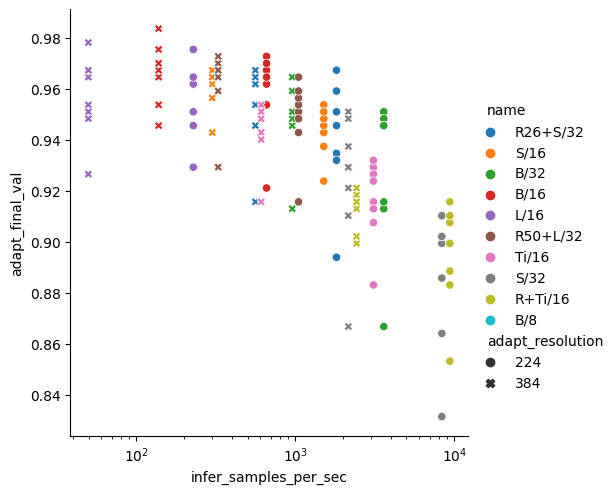

In [13]:
# Visualize the 2 (resolution) * 9 (models) * 8 (lr, steps) finetunings for a
# single dataset (Pets37).
# Note how larger models get better scores up to B/16 @384 even on this tiny
# dataset, if pre-trained sufficiently.
sns.relplot(
    data=best_df.query('adapt_ds=="oxford_iiit_pet"'),
    x='infer_samples_per_sec',
    y='adapt_final_val',
    hue='name',
    style='adapt_resolution'
)
plt.gca().set_xscale('log');

In [14]:
# More details for a single pre-trained checkpoint.
best_df.query('name=="R26+S/32" and adapt_ds=="oxford_iiit_pet"')[[
  col for col in best_df.columns if col.startswith('adapt_')
]].sort_values('adapt_final_val')

,adapt_ds,adapt_lr,adapt_steps,adapt_resolution,adapt_final_val,adapt_final_test,adapt_filename
5730,oxford_iiit_pet,0.030,2500,224,0.894022,0.867539,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.03-res_224
5762,oxford_iiit_pet,0.030,2500,384,0.915761,0.894794,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.03-res_384
5734,oxford_iiit_pet,0.030,500,224,0.932065,0.916326,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.03-res_224
5731,oxford_iiit_pet,0.010,2500,224,0.934783,0.908694,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.01-res_224
5732,oxford_iiit_pet,0.003,2500,224,0.945652,0.926410,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.003-res_224
5763,oxford_iiit_pet,0.010,2500,384,0.945652,0.934315,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.01-res_384
5735,oxford_iiit_pet,0.010,500,224,0.951087,0.928046,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.01-res_224
5766,oxford_iiit_pet,0.030,500,384,0.953804,0.941128,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.03-res_384
5733,oxford_iiit_pet,0.001,2500,224,0.959239,0.931044,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_2k-lr_0.001-res_224
5737,oxford_iiit_pet,0.001,500,224,0.959239,0.923412,R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.001-res_224


### Load a checkpoint

In [3]:
# Select a value from "adapt_filename" above that is a fine-tuned checkpoint.
filename = 'R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.003-res_384'

tfds_name = filename.split('--')[1].split('-')[0]
model_config = models_config.AUGREG_CONFIGS[filename.split('-')[0]]
resolution = int(filename.split('_')[-1])
path = f'gs://vit_models/augreg/{filename}.npz'

print(f'{tf.io.gfile.stat(path).length / 1024 / 1024:.1f} MiB - {path}')

2022-12-23 22:56:59.541450: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


137.8 MiB - gs://vit_models/augreg/R26_S_32-i21k-300ep-lr_0.001-aug_light1-wd_0.1-do_0.0-sd_0.0--oxford_iiit_pet-steps_0k-lr_0.003-res_384.npz


In [4]:
# Fetch dataset that the checkpoint was finetuned on.
# (Note that automatic download does not work with imagenet2012)
ds, ds_info = tfds.load(tfds_name, with_info=True)
ds_info

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/oxford_iiit_pet/3.2.0
INFO:absl:Reusing dataset oxford_iiit_pet (/home/hoangphuc/tensorflow_datasets/oxford_iiit_pet/3.2.0)
INFO:absl:Constructing tf.data.Dataset oxford_iiit_pet for split None, from /home/hoangphuc/tensorflow_datasets/oxford_iiit_pet/3.2.0


tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='/home/hoangphuc/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=Fal

In [17]:
# Get model instance - no weights are initialized yet.
model = models.VisionTransformer(
    num_classes=ds_info.features['label'].num_classes, **model_config)

In [18]:
# Load a checkpoint from cloud - for large checkpoints this can take a while...
params = checkpoint.load(path)

In [5]:
# Get a single example from dataset for inference.
d = next(iter(ds['test']))

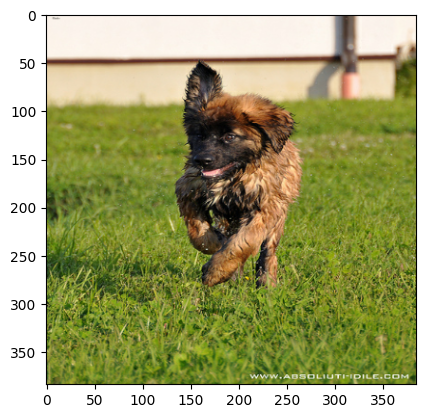

In [6]:
def pp(img, sz):
  """Simple image preprocessing."""
  img = tf.cast(img, float) / 255.0
  img = tf.image.resize(img, [sz, sz])
  return img

plt.imshow(pp(d['image'], resolution));

In [21]:
# Inference on batch with single example.
logits, = model.apply({'params': params}, pp(d['image'], resolution).numpy()[None], train=False)

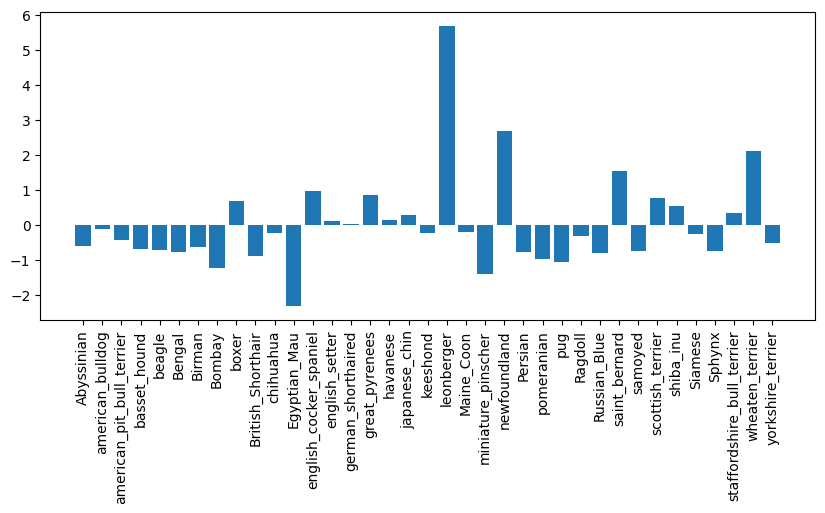

In [22]:
# Plot logits (you can use tf.nn.softmax() to show probabilities instead).
plt.figure(figsize=(10, 4))
plt.bar(list(map(ds_info.features['label'].int2str, range(len(logits)))), logits)
plt.xticks(rotation=90);

### Using timm

In [7]:
import timm
import torch

In [8]:
# For available model names, see here:
# https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py
# https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer_hybrid.py
timm_model = timm.create_model(
    'vit_small_r26_s32_384', num_classes=ds_info.features['label'].num_classes)

# Non-default checkpoints need to be loaded from local files.
if not tf.io.gfile.exists(f'{filename}.npz'):
  tf.io.gfile.copy(f'gs://vit_models/augreg/{filename}.npz', f'{filename}.npz')
timm.models.load_checkpoint(timm_model, f'{filename}.npz')

In [9]:
def pp_torch(img, sz):
  """Simple image preprocessing for PyTorch."""
  img = pp(img, sz)
  img = img.numpy().transpose([2, 0, 1])  # PyTorch expects NCHW format.
  return torch.tensor(img[None])

with torch.no_grad():
  logits, = timm_model(pp_torch(d['image'], resolution)).detach().numpy()

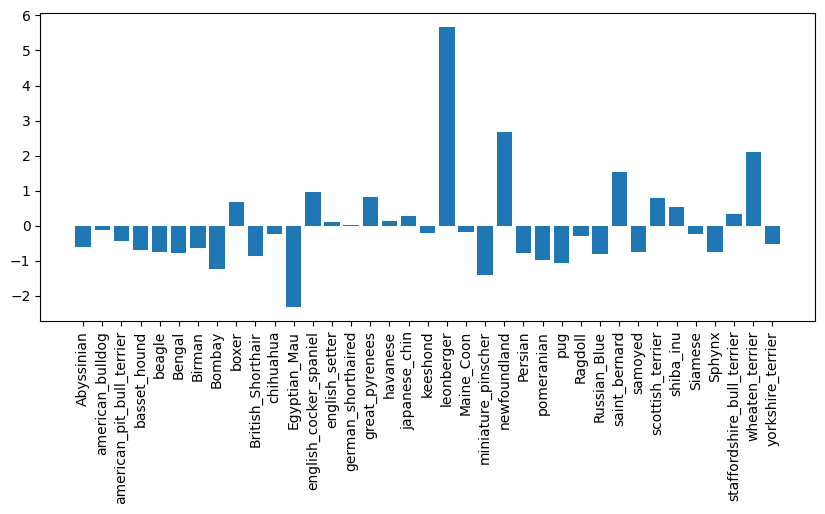

In [10]:
# Same results as above (since we loaded the same checkpoint).
plt.figure(figsize=(10, 4))
plt.bar(list(map(ds_info.features['label'].int2str, range(len(logits)))), logits)
plt.xticks(rotation=90);

### Fine-tune

### TensorBoard

In [11]:
# Launch tensorboard before training - maybe click "reload" during training.
%load_ext tensorboard
%tensorboard --logdir=./workdirs

### From tfds

In [12]:
# Create a new temporary workdir.
workdir = f'./workdirs/{int(time.time())}'
workdir

'./workdirs/1671811034'

In [13]:
# Get config for specified model.

# Note that we can specify simply the model name (in which case the recommended
# checkpoint for that model is taken), or it can be specified by its full
# name.
config = augreg_config.get_config('R_Ti_16')

# A very small tfds dataset that only has a "train" split. We use this single
# split both for training & evaluation by splitting it further into 90%/10%.
config.dataset = 'tf_flowers'
config.pp.train = 'train[:90%]'
config.pp.test = 'train[90%:]'
# tf_flowers only has 3670 images - so the 10% evaluation split will contain
# 360 images. We specify batch_eval=120 so we evaluate on all but 7 of those
# images (remainder is dropped).
config.batch_eval = 20
config.batch = 64
# Some more parameters that you will often want to set manually.
# For example for VTAB we used steps={500, 2500} and lr={.001, .003, .01, .03}
config.base_lr = 0.01
config.shuffle_buffer = 1000
config.total_steps = 10000
config.warmup_steps = 100
config.eval_every = 1000
config.accum_steps = 0  # Not needed with R+Ti/16 model.
config.pp['crop'] = 224

In [14]:
# Call main training loop. See repository and above Colab for details.
state = train.train_and_evaluate(config, workdir)

INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/tf_flowers/3.0.1
INFO:absl:Field info.splits from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.supervised_keys from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.module_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Reading dataset from tfds "tf_flowers"
INFO:absl:Load dataset info from /home/hoangphuc/tensorflow_datasets/tf_flowers/3.0.1
INFO:absl:Field info.splits from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.supervised_keys from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.module_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Reusing dataset tf_flowers (/home/hoangphuc/tensorflow_datasets/tf_flowers/3.0.1)
INFO:absl:Constructing tf.data.Dataset tf_flowers for split train[:90%], from /home/hoangphuc/tensorf

### From JPG files

In [2]:
base = '.'  # Store data on VM (ephemeral).

In [3]:
# Download some dataset & unzip.
! rm -rf '$base/flower_photos'; mkdir -p '$base'
! (cd '$base' && curl https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz | tar xz)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  9289k      0  0:00:24  0:00:23  0:00:01 9719k  9298k      0  0:00:24  0:00:24 --:--:-- 9625k


In [5]:
# Since the default file format of above "tf_flowers" dataset is
# flower_photos/{class_name}/{filename}.jpg
# we first need to split it into a "train" (90%) and a "test" (10%) set:
# flower_photos/train/{class_name}/{filename}.jpg
# flower_photos/test/{class_name}/{filename}.jpg

def split(base_dir, test_ratio=0.1):
  paths = glob.glob(f'{base_dir}/*/*.jpg')
  random.shuffle(paths)
  counts = dict(test=0, train=0)
  for i, path in enumerate(paths):
    split = 'test' if i < test_ratio * len(paths) else 'train'
    *_, class_name, basename = path.split('/')
    dst = f'{base_dir}/{split}/{class_name}/{basename}'
    if not os.path.isdir(os.path.dirname(dst)):
      os.makedirs(os.path.dirname(dst))
    shutil.move(path, dst)
    counts[split] += 1
  print(f'Moved {counts["train"]:,} train and {counts["test"]:,} test images.')

split(f'{base}/flower_photos')

NameError: name 'glob' is not defined

In [ ]:
# Create a new temporary workdir.
workdir = f'./workdirs/{int(time.time())}'
workdir

In [ ]:
# Read data from directory containing files.
# (See cell above for more config settings)
config.dataset = f'{base}/flower_photos'

In [ ]:
# And fine-tune on images provided
opt = train.train_and_evaluate(config, workdir)